***Problem Statement***


***Business Context***

Streaming media services facilitate on-demand or real-time presentation and distribution of audio, video, and multimedia content across a communications route without downloading the files to their systems. This saves users time and storage, and at the same time provides the media owners with built-in copy protection. In today's digital space, streaming has become an influential medium for accessing information. Improved connectivity and advancement in technology have made streaming services accessible to almost everyone having an internet connection, and the surging demand for on-demand entertainment services such as entertainment programs and live matches is boosting the adoption of streaming media services globally.

Streamist is a streaming company that streams web series and movies to a worldwide audience. Every content on their portal is rated by the viewers, and the portal also provides other information for the content like the number of people who have watched it, the number of people who want to watch it, the number of episodes, duration of an episode, etc.

***Objective***

Streamist is currently focusing on the anime available in their portal and wants to identify the most important factors involved in rating an anime. As a data scientist at Streamist, you are tasked with analyzing the portal's anime data and identifying the important factors by building a predictive model to predict the rating of an anime.

***Data Dictionary***
    
Each record in the database provides a description of an anime. A detailed data dictionary can be found below.

- title: title of the anime
- mediaType: format of publication
- eps: number of episodes (movies are considered 1 episode)
- duration: duration of an episode in minutes
- startYr: the year that airing started
- finishYr: the year that airing finished
- description: the synopsis of the plot
- contentWarn: content warning
- watched: number of users that completed it
- watching: number of users that are watching it
- rating: average user rating
- votes: number of votes that contribute to the rating
- studio_primary: studios responsible for creation
- studios_colab: whether there was a collaboration between studios for anime production
- genre: genre to which the anime belongs

In [1]:
#libraries to help with data reading and manipulation
import pandas as pd
import numpy as np

#libraries that help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#model building
from sklearn.linear_model import LinearRegression

###### READ THE DATASET

In [2]:
df = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\FEMTECH\Datasets\anime_ratings_data.csv")
df.sample(10)

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
5616,Zatch Bell Movie 1: 101st Devil,Movie,1,67.0,2004,2004,While the battle to determine the next king of...,No,1408,14,3.541,657.0,Toei Animation,No,Other
4097,Lalala Lala-chan: Patapata Daisensou,TV,12,5.0,2016,2017,NaN,No,17,1,1.941,12.0,Others,No,Other
2224,Altair: A Record of Battles,TV,24,5.0,2017,2017,The clouds of war are gathering over the Türki...,No,1214,199,3.715,1213.0,Others,No,Other
4064,Dorami-chan: Hello Kyouryuu Kids!!,Movie,1,41.0,1993,1993,"To confirm that birds descend from dinosaurs, ...",No,111,3,2.477,51.0,Others,No,Other
3610,Free! -Take Your Marks-,Movie,1,67.0,2017,2017,While Haru and Makoto prepare to move to colle...,No,2070,102,4.278,1123.0,Others,No,Other
5998,LINE Novel CM,Other,2,3.0,2019,2019,NaN,No,44,4,2.704,27.0,Others,Yes,Other
6450,Ace Attorney Season 2,TV,23,10.0,2018,2019,Second season of Ace Attorney.,No,715,199,3.664,600.0,Others,No,Drama
6432,Doraemon: Nobita to Animal Planet,Movie,1,67.0,1990,1990,"One night during a dream, Nobita enters a myst...",No,769,6,3.174,375.0,Others,No,Other
4488,Fate/Zero Remix,TV Special,2,24.0,2012,2012,Two recap episodes that summerize the first se...,No,372,9,3.367,211.0,Others,No,Other
4641,Jewelpet Sunshine,TV,34,5.0,2011,2012,"Ruby, a white Japanese hare, studied with her ...",No,146,21,2.527,93.0,Others,No,Other


In [3]:
# Every output must have an insight i.e, based on your view dataset, give as much as insight as you can

- There are missing values in the data
- Many animes seems not to have content warning
- Many studio primarey seems to belong to the other category
- The start yr for most movies tend to be in the 2000s
- The rating ranges from 2 to 4
- There seems to beno studio collab for ost anime production
- Most anime genre belongs to the other category

DATA OVERVIEW

In [4]:
df.shape

(6523, 15)

- There are 6523 rows and 15 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6523 non-null   object 
 1   mediaType       6496 non-null   object 
 2   eps             6523 non-null   int64  
 3   duration        6248 non-null   float64
 4   startYr         6523 non-null   int64  
 5   finishYr        6523 non-null   int64  
 6   description     4114 non-null   object 
 7   contentWarn     6523 non-null   object 
 8   watched         6523 non-null   int64  
 9   watching        6523 non-null   int64  
 10  rating          6523 non-null   float64
 11  votes           6496 non-null   float64
 12  studio_primary  6523 non-null   object 
 13  studios_colab   6523 non-null   object 
 14  genre           6523 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 764.5+ KB


- There are 3 floats, 5 integers and 7 strings

In [6]:
df.describe()

,eps,duration,startYr,finishYr,watched,watching,rating,votes
count,6523.000000,6248.000000,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,6496.000000
mean,8.716235,18.396287,2005.241147,2005.575349,1347.948643,57.445654,2.962553,906.253233
std,11.002479,20.949350,12.911035,12.568169,1737.138112,76.527405,0.760486,1171.677648
min,1.000000,1.000000,1967.000000,1970.000000,5.000000,0.000000,1.111000,10.000000
25%,1.000000,5.000000,2000.000000,2000.000000,56.000000,2.000000,2.371000,34.000000
50%,1.000000,7.000000,2010.000000,2010.000000,349.000000,13.000000,2.944000,227.500000
75%,12.000000,25.000000,2015.000000,2015.000000,2252.500000,98.000000,3.568000,1567.750000
max,34.000000,67.000000,2020.000000,2020.000000,4649.000000,199.000000,4.702000,3100.000000


- The range of the rating data is from 1.1 - 4.7 and the mean rate is 2.96
- 50% of the anime data are movies. (for me, looking at the eps column.)
- An anime video has a min duration of 1 min and max is 67 mins i.e the range of our anime videos is from 1 min to 67 min
- 50% of our anime videos duration is 7 mins
- 50% of anime production started and finished airing in 2010
- The minimum tme an anime was watched is 5 mins ad the maximum time is 4649 mins
- 

In [7]:
df.nunique()

title             6523
mediaType            8
eps                 34
duration            88
startYr             54
finishYr            51
description       4081
contentWarn          2
watched           1912
watching           198
rating            2781
votes             1554
studio_primary      11
studios_colab        2
genre                9
dtype: int64

- There are 2 Binary variables and 3 categorical variables

In [8]:
df.isnull().sum()

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

- There are empty cells in 4 columns.

In [9]:
df.duplicated().sum()

np.int64(0)

- There are no duplicated values.

##### it is most preferable to visualize, clean and visualize. in such case go back to your cleaning and do make the necessary format until your before and after visualization is in line with eachother.

##### EDA

In [10]:
def uni_continuous (data, feature):
    sns.histplot(data=data, x=feature, kde=True)
    plt.show()
    sns.boxplot(data=data, x=feature)

def uni_count(data,feature):
    sns.countplot(data=data, x=feature)
    plt.xticks(rotation = 45)

In [11]:
df.sample(10)

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
259,Sailor Moon Super S Special,TV Special,3,49.0,1995,1995,NaN,No,4406,36,3.615,2139.0,Toei Animation,No,Other
2969,Hibari no Yadogae,Movie,1,5.0,1967,1970,The life of a lark is never dull! Whether it’s...,No,162,2,1.684,98.0,Others,No,Other
2456,Titana: Aiiru Periru,Music Video,1,4.0,2018,2018,NaN,No,27,0,2.279,16.0,Others,No,Other
5143,Konohana Kitan,TV,12,5.0,2017,2017,Konohana Kitan is the heartwarming story of a ...,No,2438,199,3.915,2111.0,Others,No,Other
1490,Shisha no Sho,Movie,1,67.0,2005,2005,Lady Iratsume is a famed beauty in the capital...,No,118,5,2.502,66.0,Others,No,Other
3327,Sengoku Basara: Samurai Kings,TV,12,12.0,2009,2009,"The time is centuries ago, during the Sengoku ...",Yes,4649,199,3.804,3100.0,Production I.G,No,Other
6052,Prison School OVA,OVA,1,34.0,2016,2016,The OVA will feature the previously unanimated...,Yes,4517,76,4.006,2957.0,J.C. Staff,No,Other
41,Sailor Moon S Memorial,OVA,1,67.0,1999,1999,"With the defeat of the Dark Moon clan, the fut...",No,988,9,3.763,412.0,Toei Animation,No,Other
3466,Inaka Nezumi to Machi Nezumi,Movie,1,9.0,1967,1970,NaN,No,28,0,2.043,15.0,Others,No,Other
3019,The Testament of Sister New Devil BURST,TV,10,5.0,2015,2015,"While Basara, Mio, and Yuki have picked up the...",Yes,4649,199,3.663,3100.0,Others,No,Other


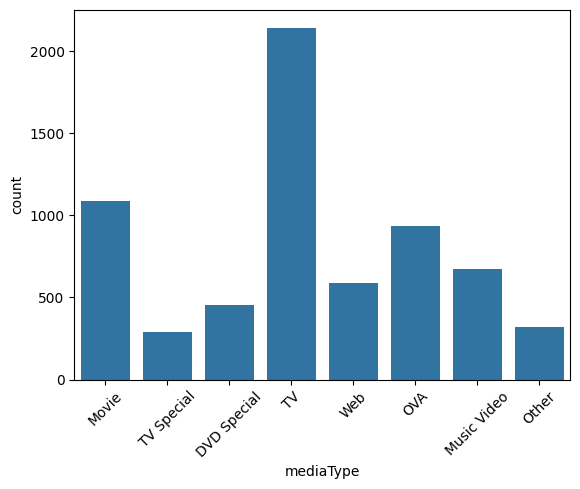

In [12]:
uni_count(df,'mediaType')

In [13]:
#not visualizing title and description
# univariate and bivariate
#rating no need to do bivariate of eps against rating
# do heatmap for thE LAST one
# no need to visualize startYr and finishYr


In [14]:
df.eps.value_counts()

eps
1     3272
12     617
34     596
13     339
2      283
26     278
3      181
4      150
6      149
24     128
25     106
10      68
5       49
8       40
11      39
7       33
22      28
23      27
20      25
16      22
9       15
15      12
14      10
30       9
32       8
21       8
27       8
18       5
29       5
33       4
28       3
31       3
17       2
19       1
Name: count, dtype: int64

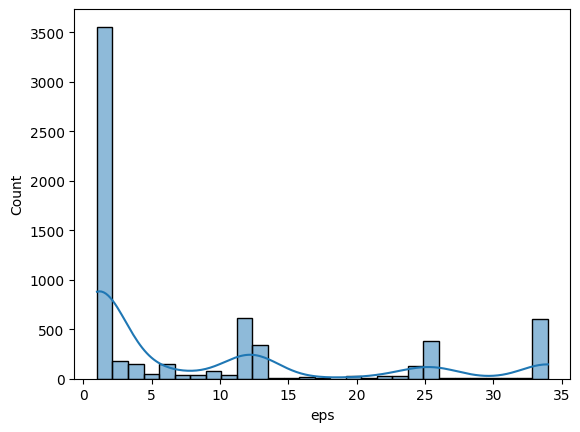

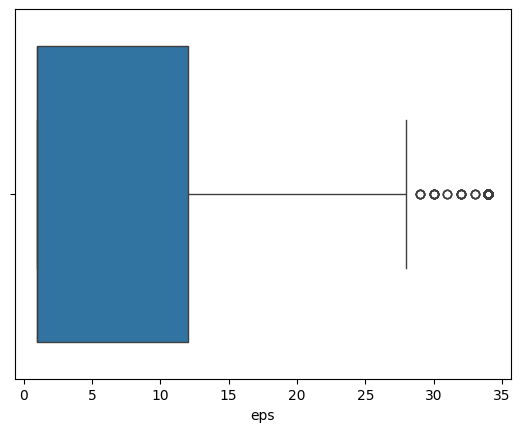

In [15]:
uni_continuous(df, 'eps')

- Right skewed distribution
- There are outliers in the dataset.
- Videos with one episode  have the highest count

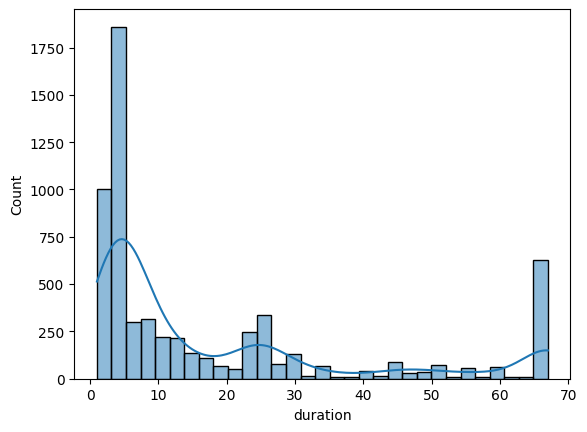

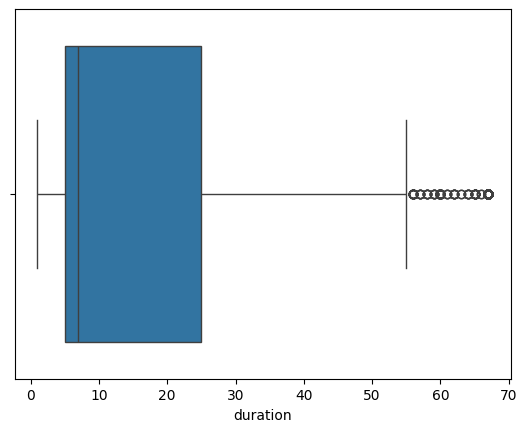

In [16]:
uni_continuous(df, 'duration')

- Rightly skewed distribution.
- There are outliers in the dataset
- 

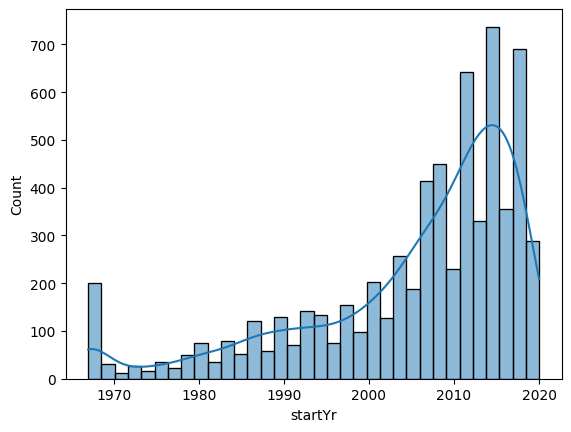

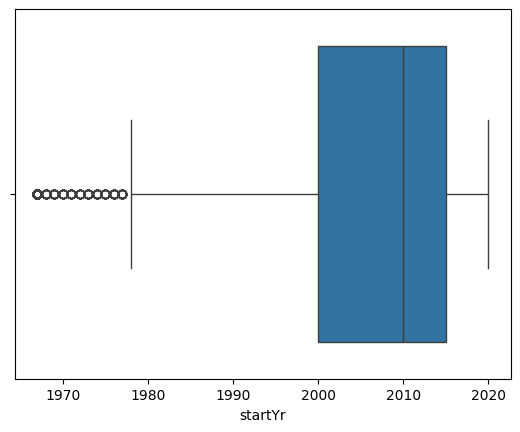

In [17]:
uni_continuous(df, 'startYr')

- Its a left skewd distribution
- There are outliers in the dataset
  

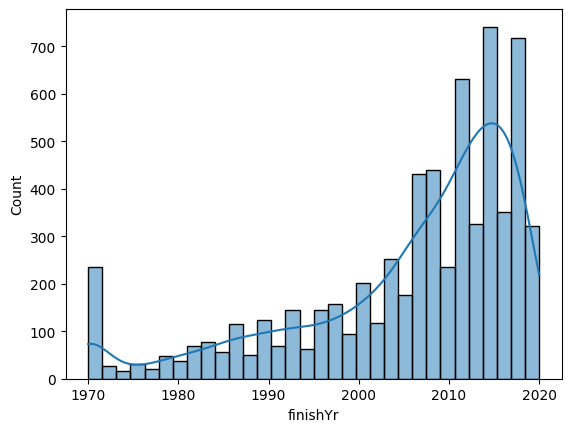

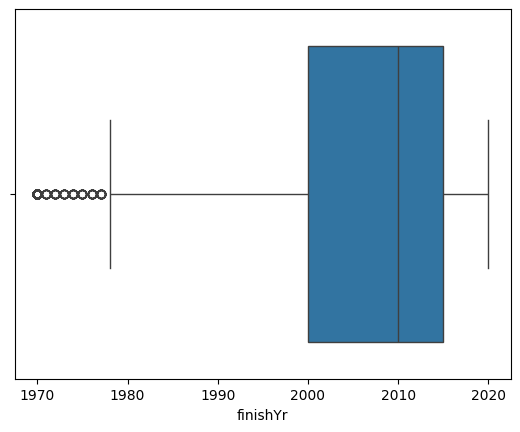

In [18]:
uni_continuous(df, 'finishYr')

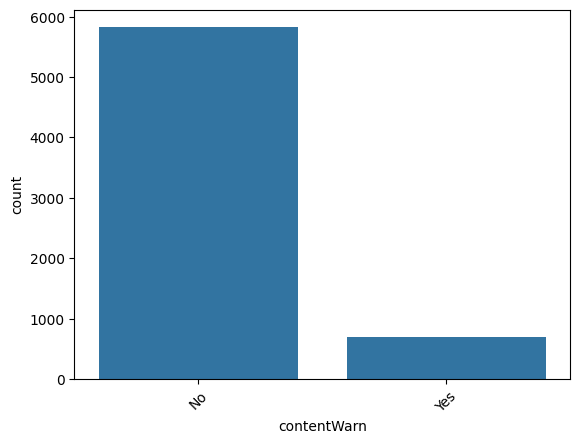

In [19]:
uni_count(df,'contentWarn')

- There are more videos that do not have content warning than videos that have

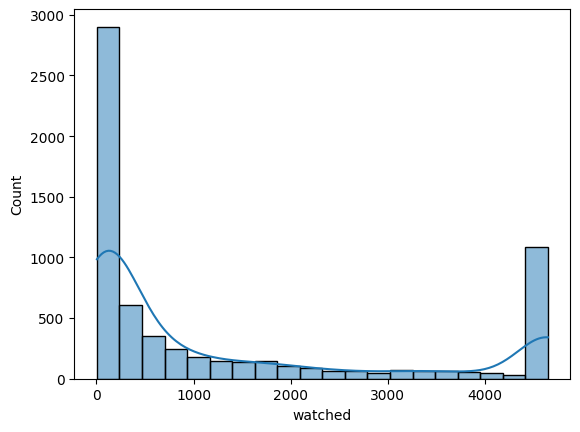

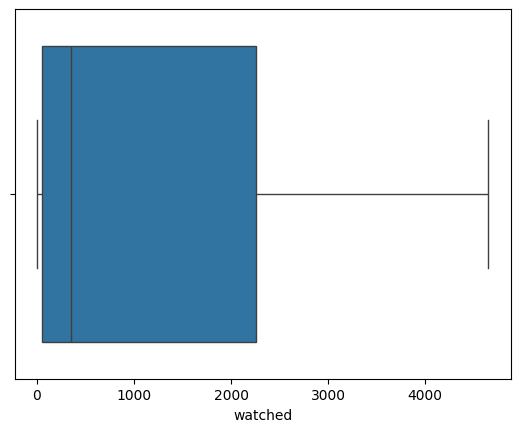

In [20]:
uni_continuous(df, 'watched')

- its a right skewed distribution
- There are no outliers

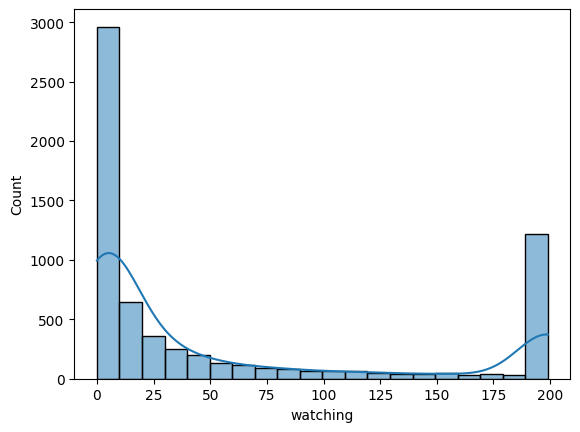

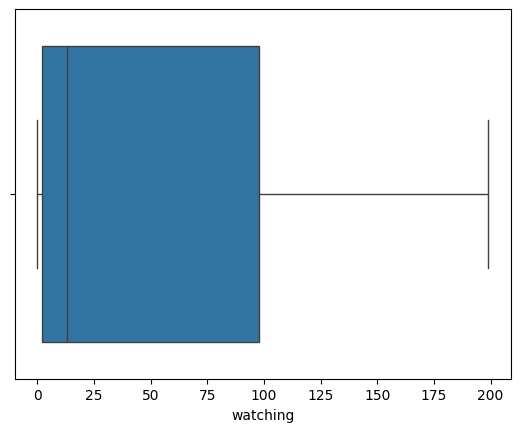

In [21]:
uni_continuous(df, 'watching')

- A right skewed distribution
- There are no outliers

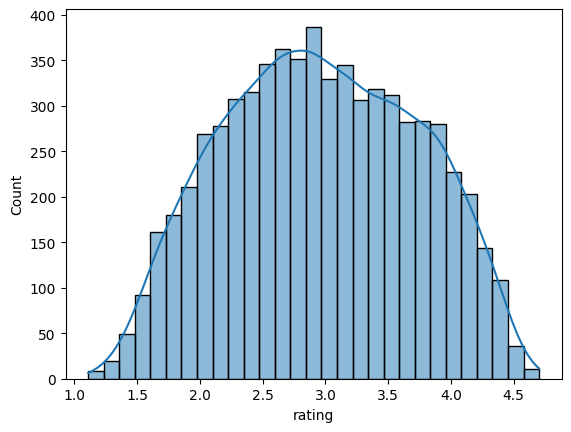

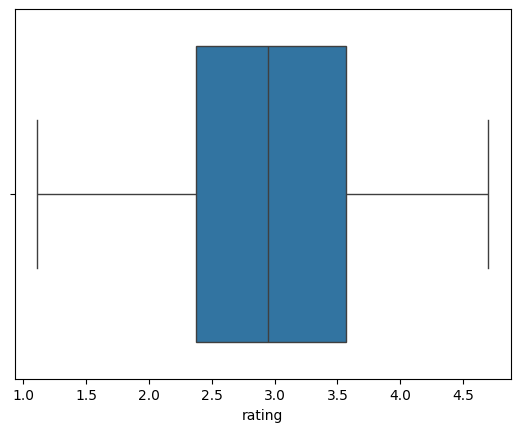

In [22]:
uni_continuous(df, 'rating')

- This is a normal distribution
- There are no outliers.

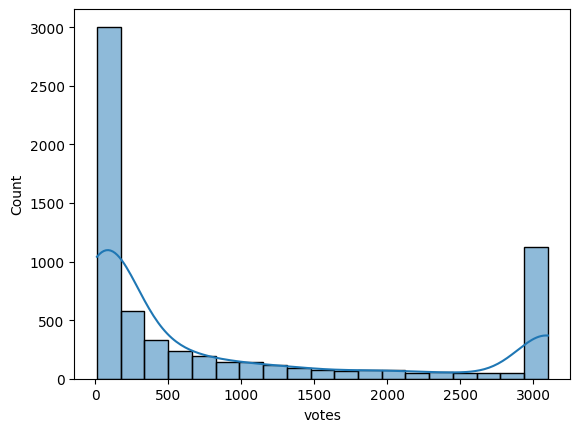

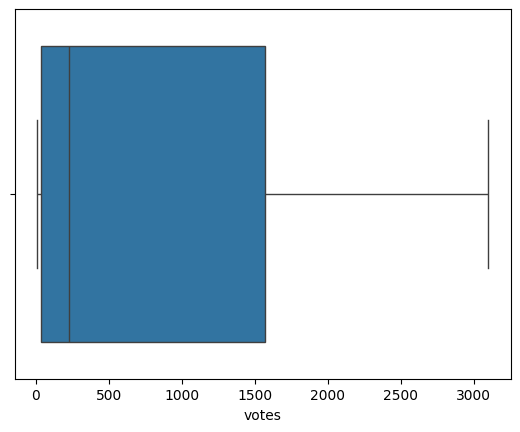

In [23]:
uni_continuous(df, 'votes')

- No outliers in the dataset
- Its a right skewed distribution

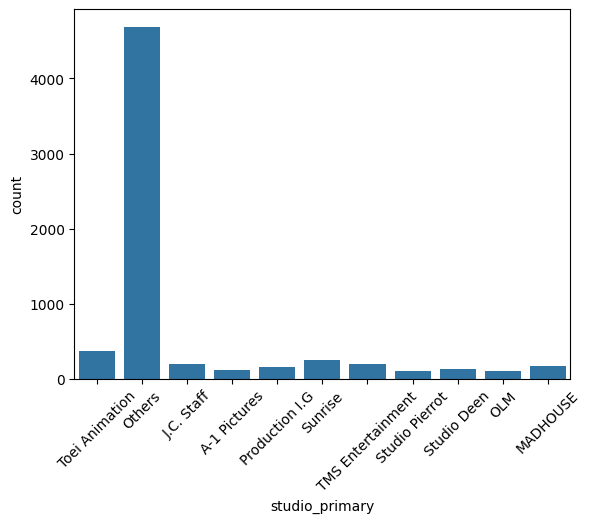

In [24]:
uni_count(df, 'studio_primary')

- Others is the most responsible for the creation of videos in the dataset.

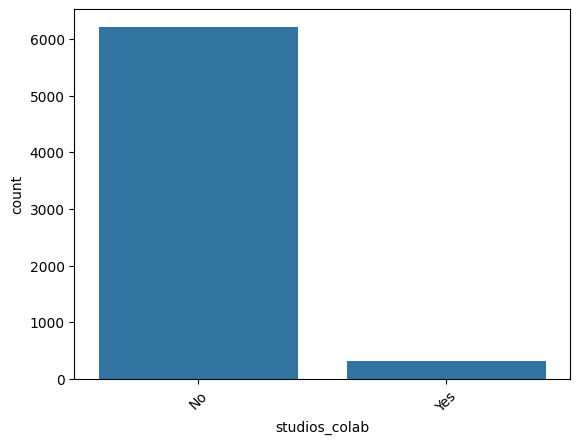

In [25]:
uni_count(df, 'studios_colab')

- Most videos do not have collaboration between studios

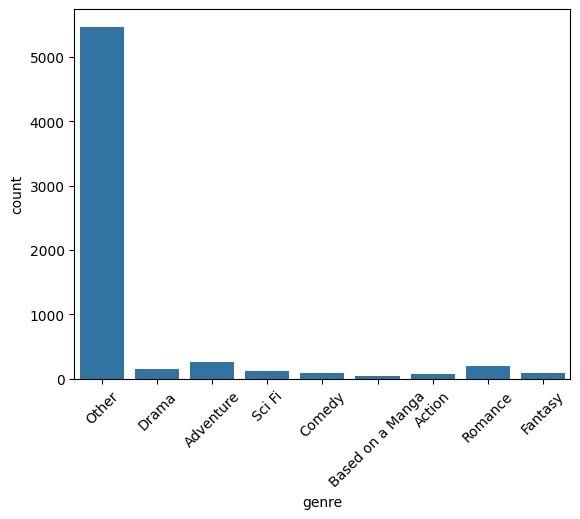

In [26]:
uni_count(df, 'genre')

- Most animes in the dataset belong to the genre Other.
- The least genere in the dataset is Based on a Manga.

BI VARIATE ANALYSIS


In [27]:
def bi_count_cont(data,feature,target):
    sns.barplot(data=data, x=feature, y=target)
    plt.xticks(rotation = 90, ha="right")

def bi_count(data,feature,target):
    sns.countplot(data=data, x=feature, hue=target)
    plt.xticks(rotation = 45)

In [28]:
df.sample()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
1928,Made in Japan,Other,1,3.0,1972,1972,NaN,No,22,0,1.678,15.0,Others,No,Other


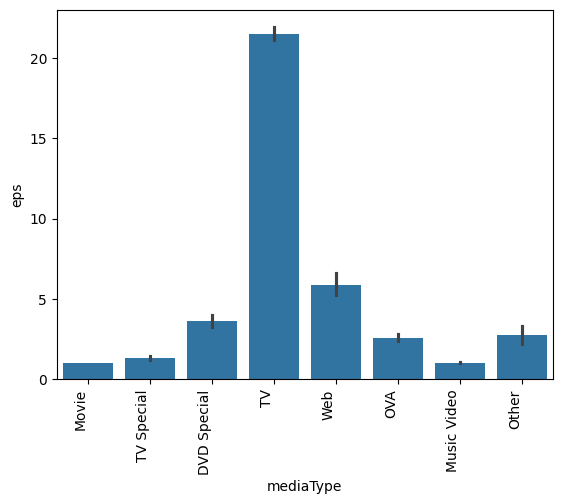

In [29]:
bi_count_cont(df,'mediaType','eps')

- The mediaType TV has the most episodes aired.
- The top 3 mediaType with the most episodes are TV, Web, DVD Special
- The bottom 3 media typea with the least episodes are Movie, TV special and music video.

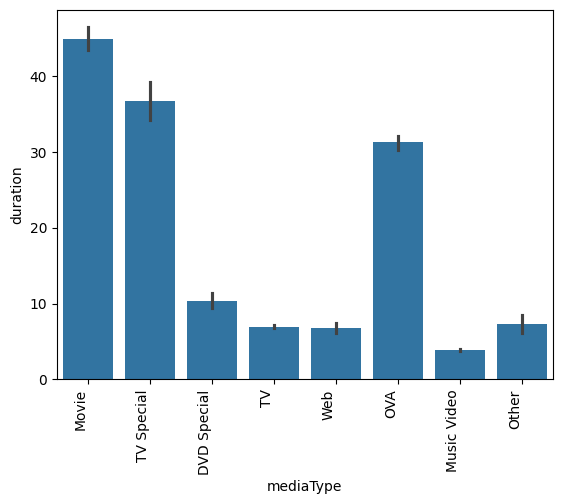

In [30]:
bi_count_cont(df,'mediaType','duration')

- The tpo 3 media type with the most duration are movie, tv special and ova
- The media tupe with the least duration is music video.

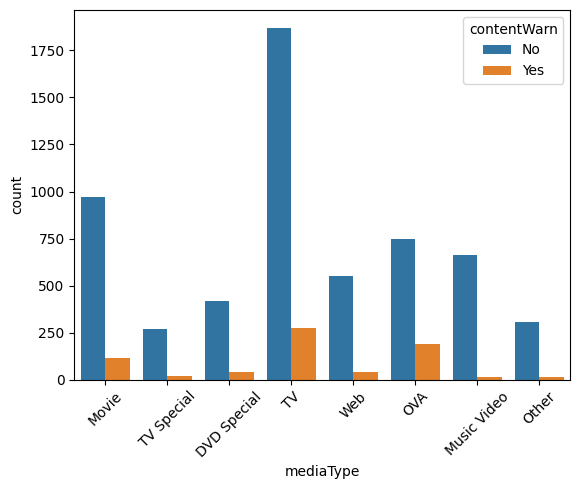

In [31]:
bi_count(df,'mediaType','contentWarn')

- There are more animes that do not have content warning across all media types, with TV media type being the highest.
- There are less animes that have content warning with the top 3 being Tv, movie and ova
  

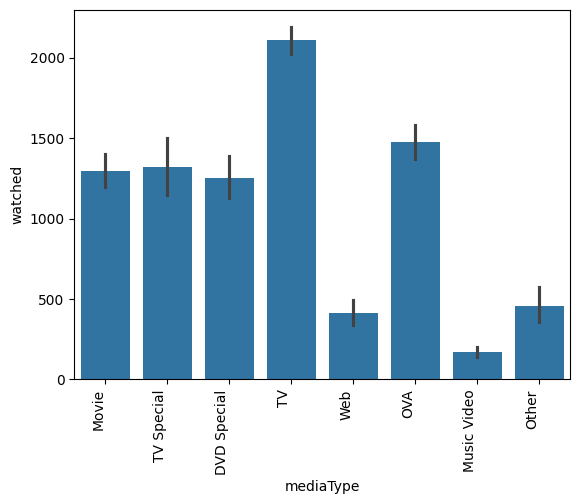

In [32]:
bi_count_cont(df,'mediaType','watched')

- The top 3 most watched media type are TV, ova and Tv special
- The bottom 3 least watched media type are music video, web and other.

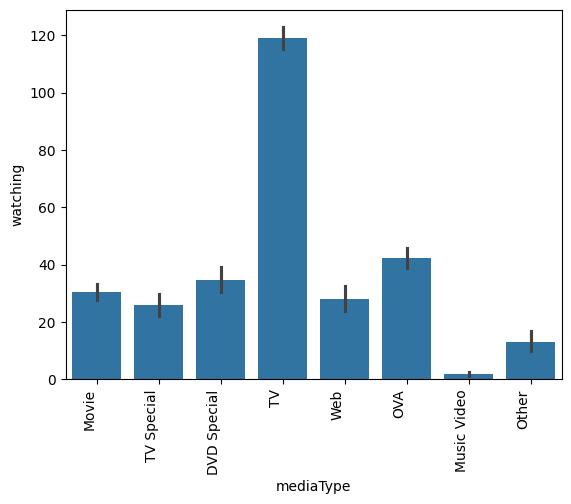

In [33]:
bi_count_cont(df,'mediaType','watching')

- The top 3 media type that viewers are watching are TV, ova and DVD special
- The bottom 3 media type hat viewrs watch the least are music video, other and tv special.

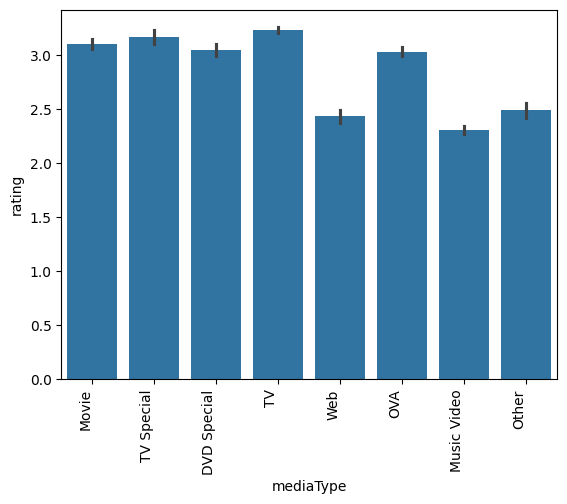

In [34]:
bi_count_cont(df,'mediaType','rating')

- Media types with their average ratings on 3.0 and above are Movie, Tv special, DVD special, TV and OVA
- Media types with their average rating below 2.5 are Web, music video and other.

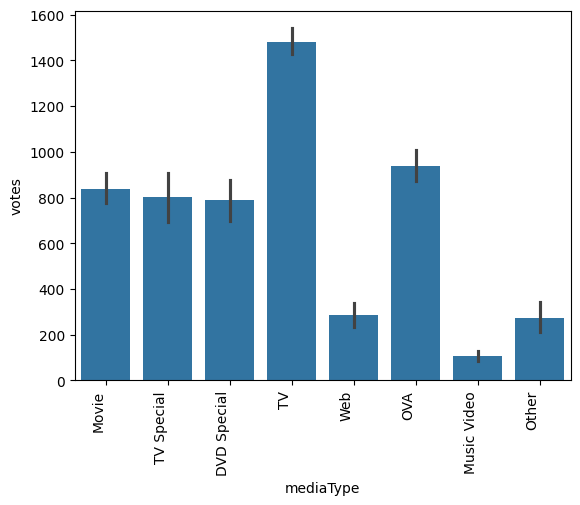

In [35]:
bi_count_cont(df,'mediaType','votes')

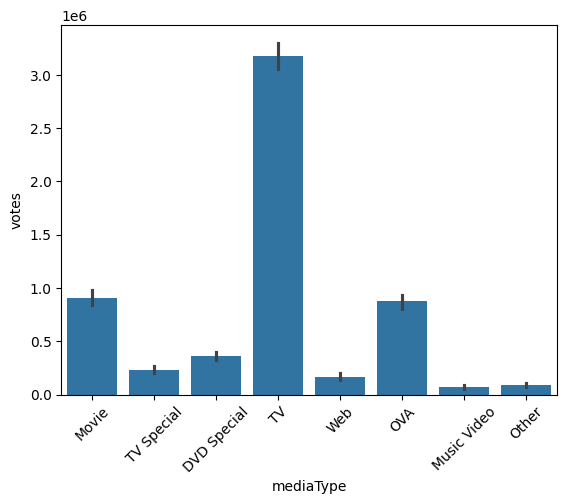

In [36]:
sns.barplot(data = df, x = 'mediaType', y= 'votes', estimator = 'sum')
plt.xticks(rotation = 45)
plt.show()

- Media type with the highest total vote is Tv.
- Media type with the least total vote is music video

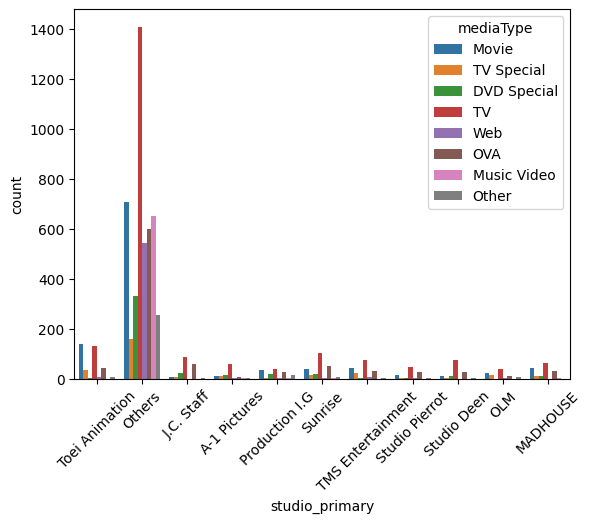

In [37]:
bi_count(df,'studio_primary','mediaType')

- Others studio is the highest studio responsible for creation across all studio_primary.
- Toei animation is the only studio that has movie as the highest media type created.
- All other studio_primary except toei animation has other media type has the highest.

In [38]:
df.sample()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
880,Tokyo Revelation,Movie,1,55.0,1995,1995,"In the streets of Tokyo, demons run rampant, s...",Yes,916,21,2.607,528.0,J.C. Staff,No,Action


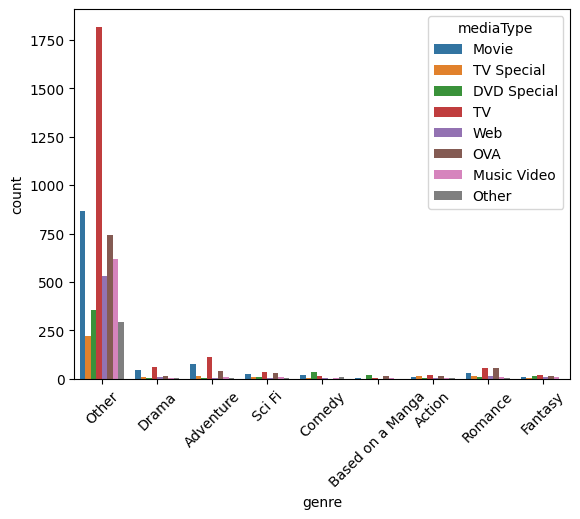

In [39]:
bi_count(df,'genre','mediaType')

- The genre, Other has the highest media type across all category.

<Axes: xlabel='contentWarn', ylabel='eps'>

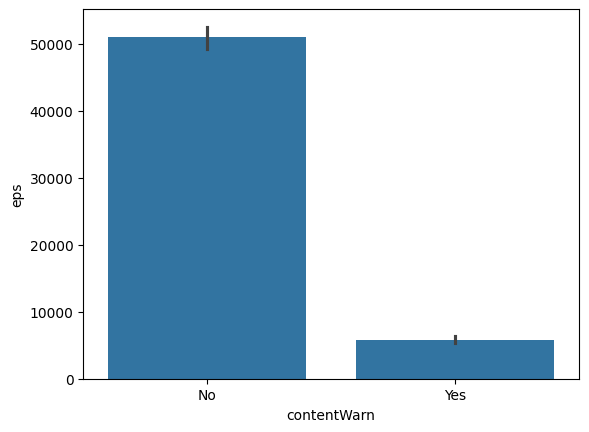

In [40]:
sns.barplot(data=df,x='contentWarn',y='eps',estimator = 'sum')

- Most episodes do not have content warning.

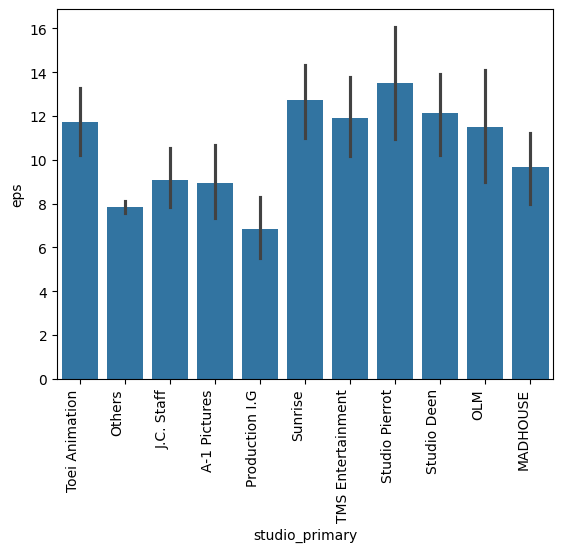

In [41]:
bi_count_cont(df,'studio_primary', 'eps')

- TMS Entertainment has the highest number of episodes.
- Production I.G creates the least number of episodes.

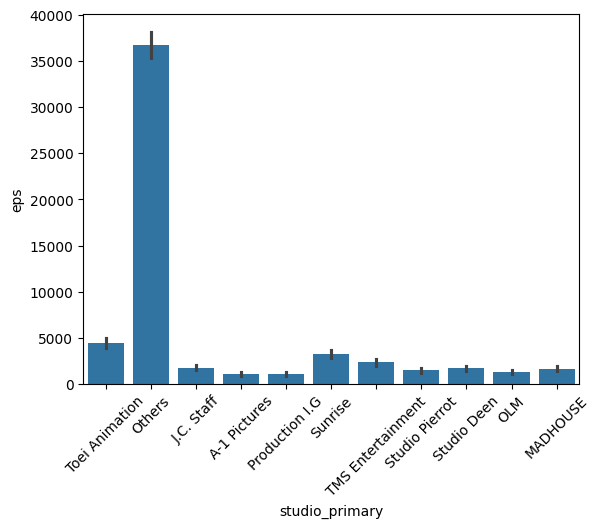

In [42]:
sns.barplot(data= df,x = 'studio_primary',y = 'eps',estimator = sum)
plt.xticks(rotation = 45)
plt.show()

- Others studio_primary has the highest total number of episodes created.
- A-1 Pictures and Production I.G have the least total number of episodes created.

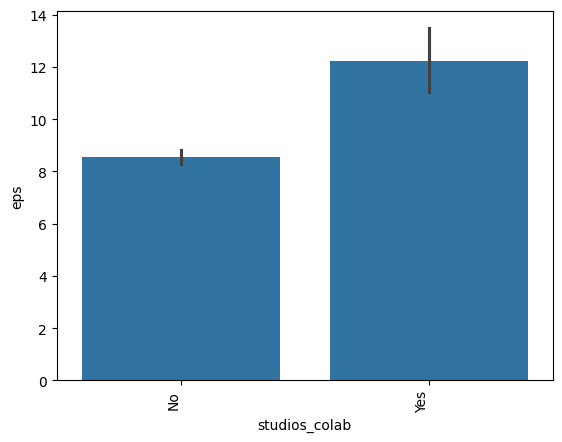

In [43]:
bi_count_cont(df,'studios_colab','eps')

- Animes that are studios collaborated have a higher episode that animes that do not have studio collaboration

<Axes: xlabel='studios_colab', ylabel='eps'>

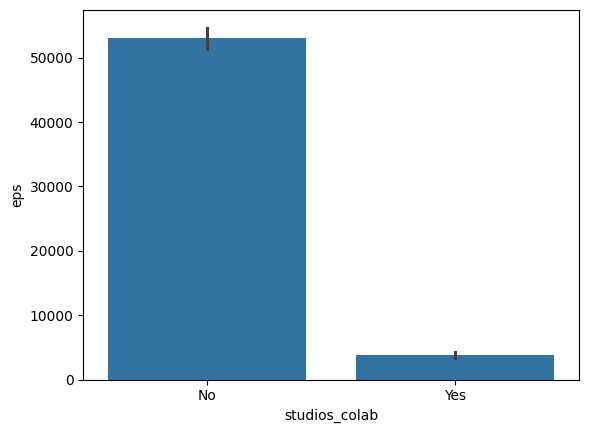

In [44]:
sns.barplot(data= df, x= 'studios_colab', y = 'eps', estimator = sum)

- Most of the total episodes do not have studio collaboration

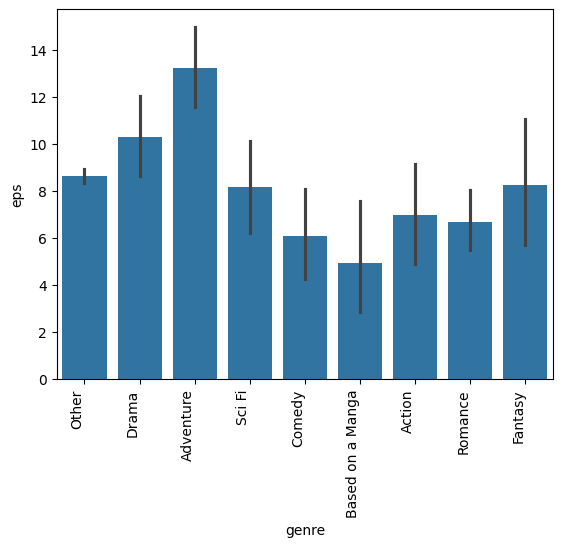

In [45]:
bi_count_cont(df,'genre','eps')

- Adventure has the highest number of episode produced.
- Based on a manga has the least number of episodes.

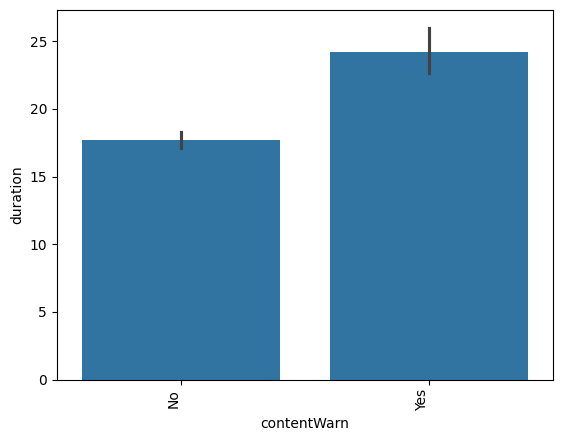

In [46]:
bi_count_cont(df,'contentWarn','duration')

- Most animes with content warning have a higher duration than those that do not have content warning.

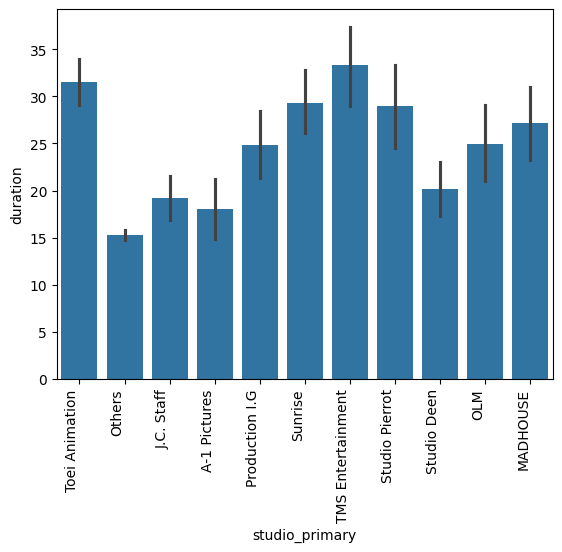

In [47]:
bi_count_cont(df,'studio_primary','duration')

- TMS Entertainment has the highest duration of animes.

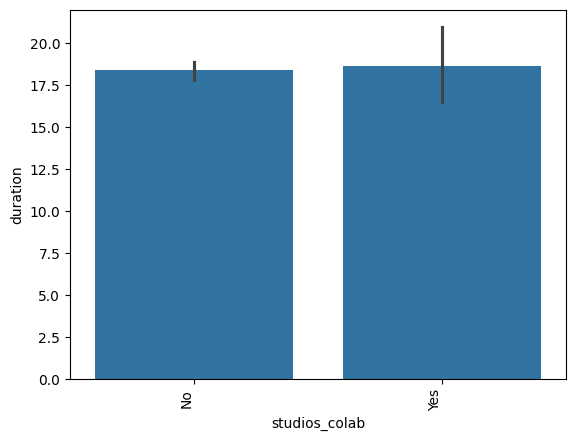

In [48]:
bi_count_cont(df,'studios_colab','duration')

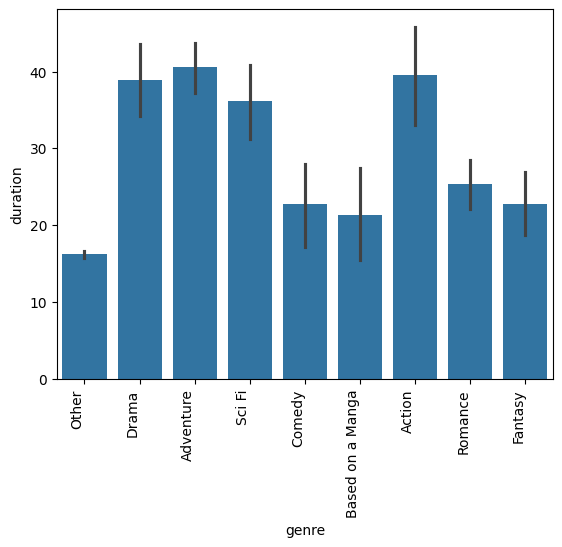

In [49]:
bi_count_cont(df,'genre','duration')

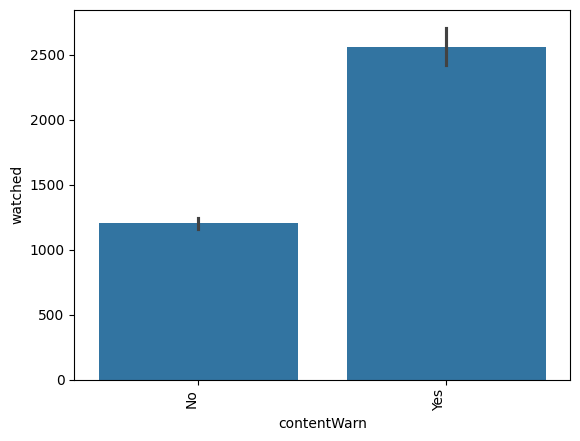

In [50]:
bi_count_cont(df,'contentWarn','watched')

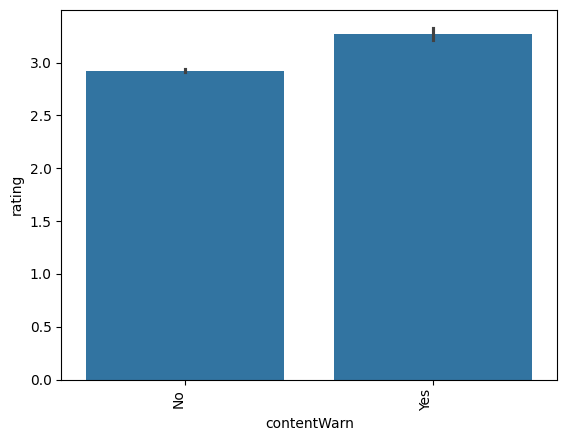

In [51]:
bi_count_cont(df,'contentWarn','rating')

- animes with content warning have a higher number of ratings that animes that don't have content warning.

<Axes: xlabel='contentWarn', ylabel='rating'>

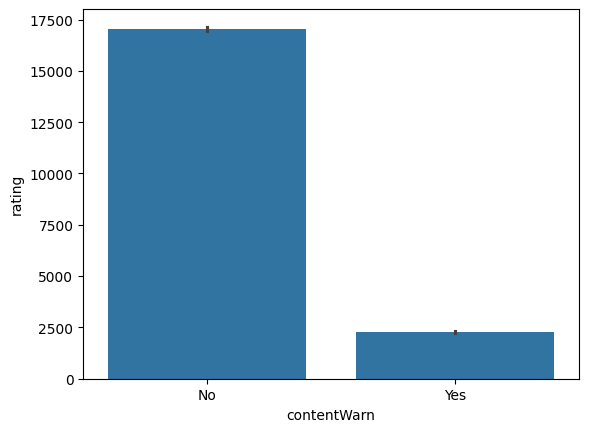

In [52]:
sns.barplot(data = df, x = 'contentWarn', y = 'rating', estimator = 'sum')


- Animes without content warning have the highest total ratings.

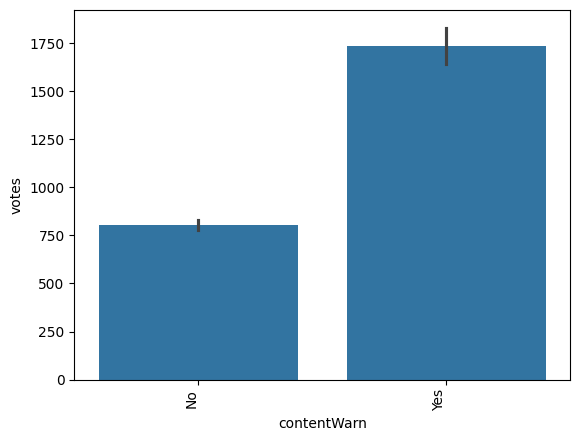

In [53]:
bi_count_cont(df,'contentWarn','votes')

- Animes without content warn have a higher number of votes.

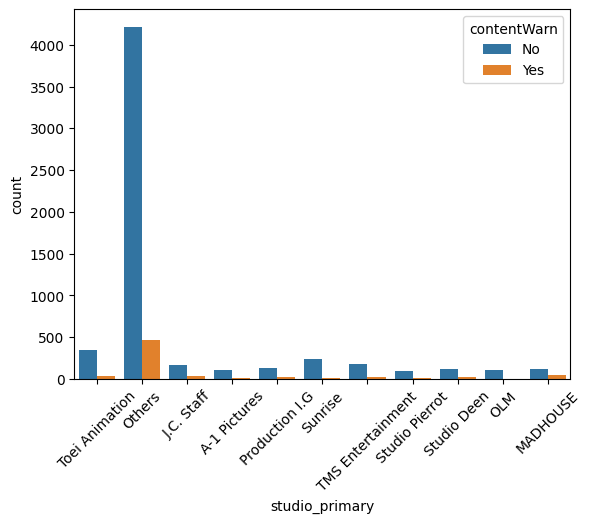

In [54]:
bi_count(df,'studio_primary','contentWarn')

- Most studio primary do not have cotent warning.


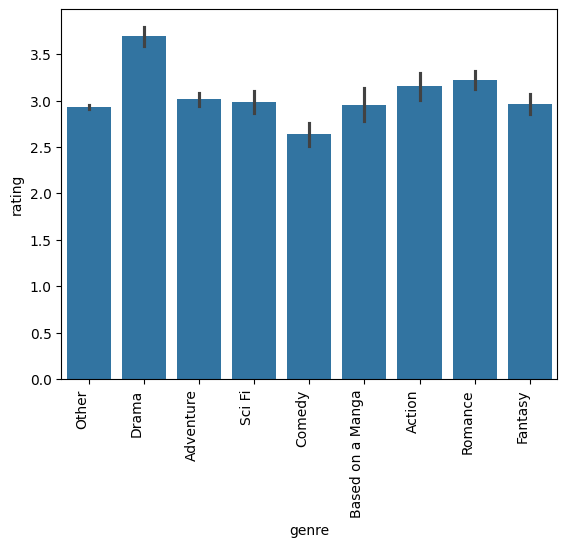

In [55]:
bi_count_cont(df,'genre','rating')

- The genre drama, action and romance has the top 3 highest rating.
- comedy has the lowest rating.

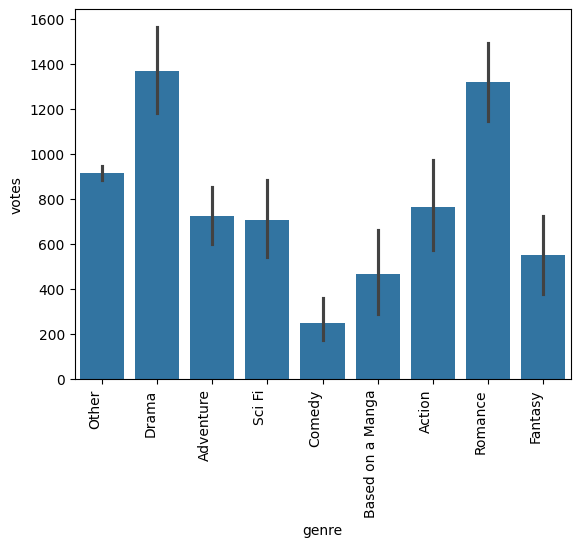

In [56]:
bi_count_cont(df,'genre','votes')

- Drama and Romance has the highest votes

In [57]:
df.sample()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
6145,Real Girl,TV,12,5.0,2018,2018,Hikari Tsutsui is a high school boy who is sat...,No,4623,199,3.418,3100.0,Others,No,Other


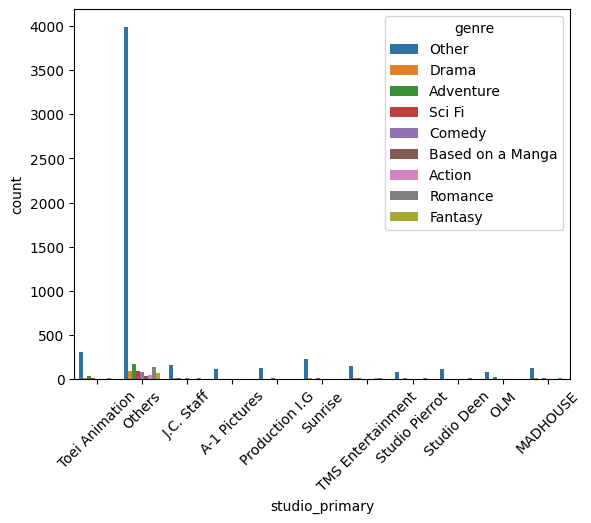

In [58]:
bi_count(df,'studio_primary','genre')

- The genre other is the highest across all category.
- Other studios primary creates animes across all genres.
- Others studio primary has the highest genres across all categories.

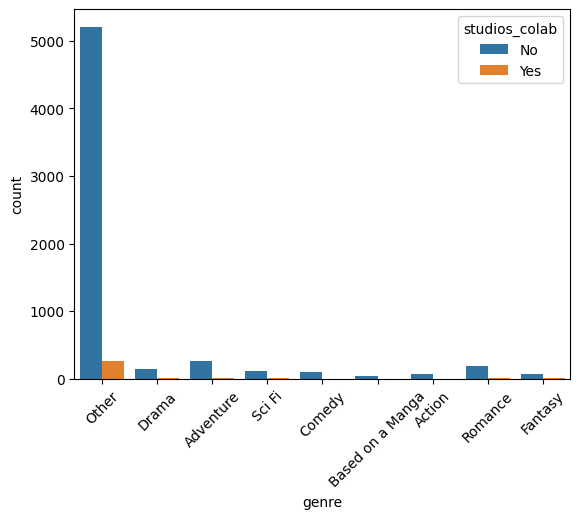

In [59]:
bi_count(df,'genre','studios_colab')

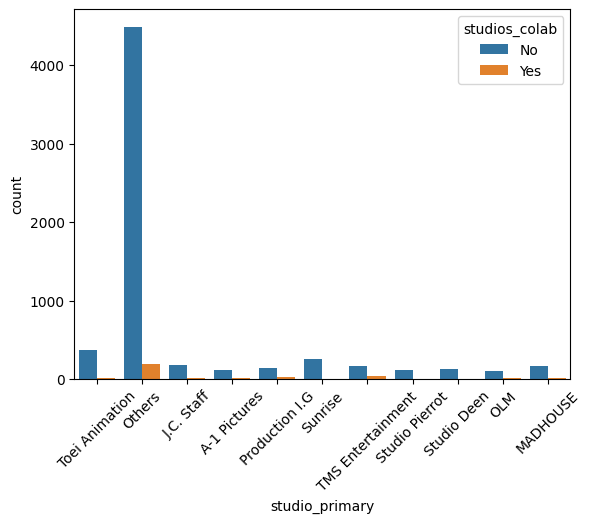

In [60]:
bi_count(df,'studio_primary','studios_colab')

- Most studio primary do not collaborate with other studios.
- Prodiction I.G, studio pierriot and TMS entertainment do not have any collaboration with other studios

In [61]:
corr=df.corr(numeric_only = True)
corr

,eps,duration,startYr,finishYr,watched,watching,rating,votes
eps,1.000000,-0.338987,-0.138738,-0.121347,0.141514,0.363967,0.196107,0.166889
duration,-0.338987,1.000000,-0.186604,-0.198392,0.116246,-0.100920,0.350919,0.091108
startYr,-0.138738,-0.186604,1.000000,0.998135,0.159349,0.252908,0.152081,0.174540
finishYr,-0.121347,-0.198392,0.998135,1.000000,0.159293,0.259328,0.151082,0.175021
watched,0.141514,0.116246,0.159349,0.159293,1.000000,0.790051,0.736158,0.992732
watching,0.363967,-0.100920,0.252908,0.259328,0.790051,1.000000,0.643165,0.828073
rating,0.196107,0.350919,0.152081,0.151082,0.736158,0.643165,1.000000,0.729158
votes,0.166889,0.091108,0.174540,0.175021,0.992732,0.828073,0.729158,1.000000


<Axes: >

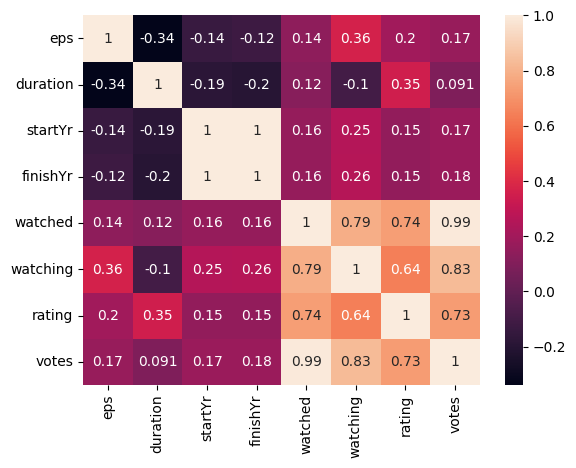

In [62]:
sns.heatmap(corr,annot = True)

- Rating to watched,votes and watching are highly correlating.
- Votes to watched watched and watching are highly correlating. 
- Watching to watched are highly correlating.
- watching to episodes and duration are weakly correlating

##### DATA CLEANING 

In [63]:
df.sample(1)

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
2357,Kuroko's Basketball: Oshaberi Demo Shimasen ka,OVA,1,17.0,2014,2014,NaN,No,962,25,3.741,523.0,Production I.G,No,Other


In [64]:
df.isnull().sum()

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

In [65]:
data =df.copy()

In [66]:
data =data.drop(['title', 'description'], axis = 1)

In [67]:
data.isnull().sum()

mediaType          27
eps                 0
duration          275
startYr             0
finishYr            0
contentWarn         0
watched             0
watching            0
rating              0
votes              27
studio_primary      0
studios_colab       0
genre               0
dtype: int64

In [68]:
data['mediaType'].unique()

array(['Movie', 'TV Special', 'DVD Special', 'TV', 'Web', 'OVA',
       'Music Video', 'Other', nan], dtype=object)

In [69]:
data['mediaType'] = data['mediaType'].fillna('Other')

In [70]:
data.isnull().sum()

mediaType           0
eps                 0
duration          275
startYr             0
finishYr            0
contentWarn         0
watched             0
watching            0
rating              0
votes              27
studio_primary      0
studios_colab       0
genre               0
dtype: int64

In [71]:
df.sample(3)

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
6073,Binbou Shimai Monogatari,TV,10,5.0,2006,2006,Asu and Kyo are two orphaned sisters; their mo...,No,1591,98,3.288,1151.0,Toei Animation,No,Other
2249,Dragon Quest: Dai no Daibouken,TV,34,NaN,1991,1992,After the defeat of the demon lord Hadlar all ...,No,1170,82,3.872,779.0,Toei Animation,No,Adventure
6459,Saint Seiya: Legend of Sanctuary,Movie,1,67.0,2014,2014,Kido Saori is a young girl troubled by her mys...,No,1009,15,3.114,701.0,Toei Animation,No,Other


In [72]:
#This data is rightly skewed and the mean is greater than the median. in this dataset, we have to look for those variables that duration are dependent on
df.duration.mean()

np.float64(18.39628681177977)

In [73]:
# checking if media type and eps affects duration
data.groupby(['mediaType', 'eps'])['duration'].mean()

mediaType    eps
DVD Special  1      14.700957
             2      11.686275
             3       7.324324
             4       9.961538
             5       5.538462
                      ...    
Web          24      7.400000
             25      3.500000
             26      8.863636
             30     15.500000
             34      7.631579
Name: duration, Length: 127, dtype: float64

In [74]:
# this looks more like a variable that affects duration
data['genre'].unique()

array(['Other', 'Drama', 'Adventure', 'Sci Fi', 'Comedy',
       'Based on a Manga', 'Action', 'Romance', 'Fantasy'], dtype=object)

In [75]:
#we grouped the duration by mediatype and genre and then calculated for their individual categorical mean() and rounded it up to 1 decimal place
round(data.groupby(['mediaType', 'genre'])['duration'].mean(), 1)

mediaType    genre           
DVD Special  Action              25.0
             Adventure           13.0
             Based on a Manga     6.4
             Comedy               6.4
             Drama               27.7
                                 ... 
Web          Drama               19.3
             Fantasy             18.4
             Other                6.2
             Romance              8.9
             Sci Fi              11.0
Name: duration, Length: 71, dtype: float64

In [76]:
# The tranform here works like a for loop. it will go throught the missing duration values in the listed categories and replace them with the individual mean
data['duration']= data['duration'].fillna(round(data.groupby(['mediaType', 'genre'])['duration'].transform('mean'), 1))

In [77]:
data.isnull().sum()

mediaType          0
eps                0
duration           8
startYr            0
finishYr           0
contentWarn        0
watched            0
watching           0
rating             0
votes             27
studio_primary     0
studios_colab      0
genre              0
dtype: int64

In [78]:
data['duration']= data['duration'].fillna(round(data.groupby(['mediaType'])['duration'].transform('mean'), 1))

In [79]:
data.isnull().sum()

mediaType          0
eps                0
duration           0
startYr            0
finishYr           0
contentWarn        0
watched            0
watching           0
rating             0
votes             27
studio_primary     0
studios_colab      0
genre              0
dtype: int64

In [80]:
data['votes']= data['votes'].fillna(round(data.groupby(['mediaType', 'genre'])['votes'].transform('mean'), 1))

In [81]:
data.isnull().sum()

mediaType         0
eps               0
duration          0
startYr           0
finishYr          0
contentWarn       0
watched           0
watching          0
rating            0
votes             0
studio_primary    0
studios_colab     0
genre             0
dtype: int64

##### FEAtURE ENGINEERING 

In [82]:
data.sample(3)

,mediaType,eps,duration,startYr,finishYr,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
1881,TV,34,5.0,1971,1972,No,21,2,2.612,13.0,Others,No,Other
5395,OVA,1,25.0,2013,2013,No,2996,29,2.820,1825.0,Others,No,Other
5899,Web,1,7.0,2015,2015,No,517,42,3.312,407.0,Others,Yes,Other


In [83]:
data['airingYr'] = data['finishYr'] - data['startYr']

In [84]:
data['Total_duration'] = data['eps'] * data['duration']

In [85]:
data['total_watch']= data['watched'] + data['watching']

In [86]:
data.sample(2)

,mediaType,eps,duration,startYr,finishYr,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,airingYr,Total_duration,total_watch
5673,Music Video,1,3.0,2015,2015,No,32,0,2.858,17.0,Others,No,Other,0,3.0,32
5706,OVA,2,25.0,2006,2006,No,1112,20,3.309,652.0,Others,No,Other,0,50.0,1132


In [87]:
data = data.drop(['eps', 'duration', 'startYr', 'finishYr', 'watched', 'watching'], axis = 1)

In [88]:
data.sample()

,mediaType,contentWarn,rating,votes,studio_primary,studios_colab,genre,airingYr,Total_duration,total_watch
4644,TV,No,1.597,11.0,Others,No,Other,0,90.0,16


SUB PLOT


In [89]:
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# sns.histplot(data=data,x="rating",kde= True)

# plt.subplot(1,2,2)
# sns.boxplot(data=data,x="rating")

##### DATA SCALING

In [90]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

In [91]:
#create an instance of the class
mms= MinMaxScaler()

In [92]:
#normalise votes column(remember to convert to dataframe cux your X should be a dataframe)
data["votes"]= mms.fit_transform(data[["votes"]])

In [93]:
data.sample()

,mediaType,contentWarn,rating,votes,studio_primary,studios_colab,genre,airingYr,Total_duration,total_watch
4931,TV,No,2.955,0.044337,Others,No,Other,0,168.0,208


In [94]:
# use for loop to normalise the rest
nums_cols=["airingYr","Total_duration","total_watch"]

for i in nums_cols:
    data[i]= mms.fit_transform(data[[i]])

In [95]:
data.sample(2)

,mediaType,contentWarn,rating,votes,studio_primary,studios_colab,genre,airingYr,Total_duration,total_watch
392,OVA,No,2.110,0.003236,Others,No,Other,0.0,0.004815,0.005994
2921,DVD Special,No,2.886,0.129773,Others,No,Other,0.0,0.004280,0.177139


##### DATA ENCODING

 CONVERTING ALPHABETICAL COLUMNS TO NUMERIC COLUMNS
- labelEncoder in scikit learn
- Dummies in pandas

In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
# create an instance of the class
le = LabelEncoder()

In [98]:
data.sample()

,mediaType,contentWarn,rating,votes,studio_primary,studios_colab,genre,airingYr,Total_duration,total_watch
6339,TV Special,No,2.663,0.183495,Others,No,Other,0.0,0.012306,0.231914


In [99]:
le_col=["contentWarn","studios_colab"]
for i in le_col:
    data[i]=le.fit_transform(data[i])

In [100]:
data.sample(3)

,mediaType,contentWarn,rating,votes,studio_primary,studios_colab,genre,airingYr,Total_duration,total_watch
1629,OVA,0,3.902,1.000000,Sunrise,0,Other,0.055556,0.388978,0.980984
2940,TV,0,4.181,1.000000,MADHOUSE,0,Other,0.055556,0.072231,1.000000
2592,Movie,0,1.998,0.009709,Others,0,Other,0.000000,0.000535,0.011575


In [101]:
# converting media type to numerical values
pd.get_dummies(data["mediaType"],drop_first=True)

,Movie,Music Video,OVA,Other,TV,TV Special,Web
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
6518,False,False,False,False,True,False,False
6519,False,False,True,False,False,False,False
6520,False,True,False,False,False,False,False
6521,False,False,False,False,True,False,False


In [102]:
#convert to int
mt=pd.get_dummies(data["mediaType"],drop_first=True,prefix="mt").astype("int")

we made a mistake and discovered it during treating multicollinearity. we had columns "other apoearing more than once and we ought to have treated that ealier by adding a prefix to out media type column". now we have to add the prefix and save as a variable, the delete media type from our for loop. with this, we kow that the remaining other and others is coming from studio primay and genre

In [103]:
# using dummies
pd_col = ["studio_primary","genre"]# create a list of all the columns you want to loop through
#empty=pd.DataFrame()# create an empty dataframe because we will need to save our dummy generated numerical values 
empty = mt
for i in pd_col:
    new=pd.get_dummies(data[i],drop_first=True).astype("int")#using dummies to convert all the values(i) in pd_cols all at once and save this into the variable called new
    empty=pd.concat([empty,new],axis=1)# This is just concatinating empty and new and the saving into the variable called empty 

In [104]:
data=data.drop(["mediaType","studio_primary","genre"],axis=1)

In [105]:
df1= pd.concat([data,empty],axis=1)
df1.sample(4)

,contentWarn,rating,votes,studios_colab,airingYr,Total_duration,total_watch,mt_Movie,mt_Music Video,mt_OVA,...,TMS Entertainment,Toei Animation,Adventure,Based on a Manga,Comedy,Drama,Fantasy,Other,Romance,Sci Fi
1769,0,2.674,0.003236,0,0.0,0.001605,0.004547,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6328,0,2.834,0.013269,0,0.0,0.001605,0.015089,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1760,0,2.633,0.001618,0,0.0,0.013376,0.003100,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4849,1,3.514,1.000000,0,0.0,0.063028,1.000000,0,0,0,...,0,0,0,0,0,1,0,0,0,0


##### SPLIT THE DATA

- Split data to x and Y

In [106]:
X = df1.drop("rating",axis=1)
y = df1.rating

##### TRAIN AND TEST DATA

In [107]:
from sklearn.model_selection import train_test_split

#its accepts to variables(x,y). Thus function returns a tuple which returns 4 sizes

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8)# or you declare test_size as = 0.2


##### MODEL BUILDING
- SIMPLE LINEAR REGRESSION

In [109]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [110]:
# check the model performance

In [111]:
lr_model.score(X_test,y_test)

0.6426975967971107

##### MODEL EVALUATION

In [112]:
#allow the model to predict first then we can make use of the metrics
y_pred = lr_model.predict(X_test)#( y pred because this is what the model predicted)

In [113]:
y_pred

array([2.62807055, 2.2755171 , 2.38714272, ..., 3.57097474, 4.40448779,
       2.58633534], shape=(1305,))

In [114]:
y_test

3355    3.458
5714    1.625
5582    2.783
4490    2.909
4881    1.975
        ...  
1189    3.887
6407    4.283
4111    3.683
2645    4.183
5526    2.585
Name: rating, Length: 1305, dtype: float64

In [115]:
# import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [116]:
mean_absolute_error(y_test,y_pred)

0.37522629484905495

In [117]:
mean_squared_error(y_test,y_pred)

0.20807007009445475

## STAT MODEL ON LINEAR REGRESSION

In [118]:
import statsmodels.api as sm

In [119]:
# first step is to create a constant in yoy X_train and X_test
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [120]:
# input the output before the input
olsmodel = sm.OLS(y_train, X_train).fit()

In [121]:
# Print the summary of our model
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     310.1
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        07:02:00   Log-Likelihood:                -3234.5
No. Observations:                5218   AIC:                             6533.
Df Residuals:                    5186   BIC:                             6743.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.9970      0.07

In [122]:
# we neeed the r-squared and adjusted R-squared we need the p values
# if pvalues <-0.05, reject null hypothesis
#if p values >0.05 reject H!

In [123]:
#to get Rsquare yourself
from sklearn.metrics import r2_score

In [124]:
y_pred = olsmodel.predict(X_test)

In [125]:
r2_score(y_test,y_pred)

0.6426975967971107

- MSE
- MAE
- RSME
- MAPE
- R2 SCORE
- ADj R2 score


In [126]:
# to calculate Adjuste r2, you will have to ccreate a function to calculate that
#1 - (1 - R-squared) * ( (n - 1)/ (n - p - 1))
# n - numbers of rows
#k- numbers of columns
def adj_r2_score(prediction,target, predictors):
    r2 = r2_score(target, prediction)
    n = predictors.shape[0]
    k = predictors.shape[1]
    adj = 1 - ((1-r2) * (n-1) / (n-k-1))
    return adj

# MAPE = (1/n) * Σ(|actual – forecast| / |actual|) * 100
def mape_score(prediction, target, predictors):
    n = predictors.shape[0]
    mape = (1/n * np.sum(np.abs(target - prediction)/ target)) * 100 # follow BODMAS(np.abs cancels out minus values 
    return mape

# Moddel performance
def model_performance(model, predictors, target):
    '''
    model = OLSMODEL
    predictors = Xtrain or X_test
    target = y_test, y_train
    '''
    # make predictions using the model
    y_pred = model.predict(predictors)

    # evaluate the model
    r2 = r2_score(target, y_pred)
    adj_r2 = adj_r2_score(y_pred, target, predictors)
    mse = mean_squared_error(target, y_pred)
    rmse = np.sqrt(mean_squared_error(target, y_pred))
    mae = mean_absolute_error(target, y_pred)
    mape = mape_score(y_pred, target, predictors)

    # put the metrics in a dataframe
    df_perf = pd.DataFrame({
    "R2": r2,
    "Adj R2": adj_r2,
    "MSE": mse,
    "RSME": rmse,
    "MAE": mae,
    "MAPE": mape
    }, index = [0])

    return df_perf

In [127]:
#Test performance
print ("Testing Performance")
model_performance(olsmodel, X_test, y_test)

Testing Performance


,R2,Adj R2,MSE,RSME,MAE,MAPE
0,0.642698,0.633709,0.20807,0.456147,0.375226,14.20486


In [128]:
# Training performance
print ("Trainning Performance")
model_performance(olsmodel, X_train, y_train)

Trainning Performance


,R2,Adj R2,MSE,RSME,MAE,MAPE
0,0.649546,0.647384,0.202272,0.449746,0.36476,13.87779


CHECKING LINEAR REGRESSION ASSUNMPTIONS
1. No multicolilinearity
2. Linearity of Variables
3. Independence of error test
4. Normality of error terms
5. No heteroscedasticity

No multicolilinearity

This occurs when predictors (X)variables in a regressio are correlated. This correlation is a problem because predictor variables should be independent. if the cprrelation between variables is high, this can cause problems when we fit the model and interpret the result. when we have multicollinearity in a linear model, the coefficient that the model suggests are unreliable

How to remove multicollinearity
- VIF - Variance inflation factor: this measures the inflation in the variances of the regression parameters due to the collinearity that exists among the predictors.

Rules
- if VIF is 1, then there is no correlation among the nth predictors and the remaining predictor variables,
1. if VIF is between 1-5, then there is low multicollinearity
2. if VIF is between 5-10, we can say there is moderate multicollinearity
3. if VIF exceeding 10, shows a sign of high multicollinearity

In [129]:
# import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [130]:
def check_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns
    #vif_sample =[]
     #sample = variance_inflation_factor(predictors.values,i)
     #vif_sample.append(sample)
     #vif["VIF"] = vif_sample
    
    #calculate the vif for each feature
    vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range (len(predictors.columns))]
    return vif

    
    
# or for i in range(len(predictors.columns)):
       


In [131]:
check_vif(X_train)

,feature,VIF
0,const,155.355080
1,contentWarn,1.099448
2,votes,64.161431
3,studios_colab,1.032498
4,airingYr,1.107113
5,Total_duration,1.726374
6,total_watch,62.986775
7,mt_Movie,2.927495
8,mt_Music Video,2.328629
9,mt_OVA,2.743834


REMOVING MULTICOLLINEARITY

- Drop every column one by one that has a vif score greater than 5
- Look at the adj r2 and RSME of the model and it must still be relatively close to the previous metrics
- Check the VIF scores again
- Continue till you get all vif scores under 5

In [132]:
# function to do this steps
# these are local variabes, and they dont affect our previous models

def treating_multicollinearity(predictors,target, high_vif_column):
    adj_r2 = []
    rsme = []
    for cols in high_vif_column:
        train = predictors.drop(cols, axis = 1)# drop the high vif
        
        ols_model = sm.OLS(target, train).fit() #immediately train the model

        #appending the adj r2 and rsme
        adj_r2.append (ols_model.rsquared_adj)
        rsme.append(np.sqrt(ols_model.mse_resid))
        
    df_vif = pd.DataFrame({
        "col": high_vif_column,
        "Adj R2": adj_r2,
        "RSME": rsme
    }).sort_values("Adj R2", ascending = False)
    return df_vif

In [133]:
treating_multicollinearity(X_train, y_train, ["votes", "total_watch"])

,col,Adj R2,RSME
0,votes,0.646877,0.451499
1,total_watch,0.635498,0.458716


In [134]:
# drop the vote column in both the training and the testing X and save into another variable so that you chan check
# note since you are just checking, do not save into the riginal data yet, that is why we created x_train and x_test 2.
X_train_2 = X_train.drop("votes", axis = 1)
X_test_2 = X_test.drop ("votes", axis = 1)

In [135]:
# checck multicollinearity again
print("After dropping votes column")
check_vif(X_train_2)

After dropping votes column


,feature,VIF
0,const,155.117671
1,contentWarn,1.098144
2,studios_colab,1.032196
3,airingYr,1.105881
4,Total_duration,1.723807
5,total_watch,1.353301
6,mt_Movie,2.920230
7,mt_Music Video,2.326363
8,mt_OVA,2.743438
9,mt_Other,1.697412


In [136]:
# the other and others stil have high multicollinearinty
treating_multicollinearity(X_train, y_train, ["Other", "Others"])

,col,Adj R2,RSME
0,Other,0.647473,0.451118
1,Others,0.644627,0.452936


In [137]:
X_train_2 = X_train_2.drop("Other", axis = 1)
X_test_2 = X_test_2.drop ("Other", axis = 1)

In [138]:
# After dropping other columns, check
print("After dropping other column")
check_vif(X_train_2)

After dropping other column


,feature,VIF
0,const,67.579737
1,contentWarn,1.096528
2,studios_colab,1.031997
3,airingYr,1.105880
4,Total_duration,1.717438
5,total_watch,1.352754
6,mt_Movie,2.920128
7,mt_Music Video,2.326357
8,mt_OVA,2.742570
9,mt_Other,1.697405


In [139]:
# we can drop the second other since it also doest affect our evaluation metrics
X_train_2 = X_train_2.drop("Others", axis = 1)
X_test_2 = X_test_2.drop ("Others", axis = 1)

In [140]:
print("After dropping other column")
check_vif(X_train_2)

After dropping other column


,feature,VIF
0,const,16.106295
1,contentWarn,1.096043
2,studios_colab,1.031882
3,airingYr,1.105558
4,Total_duration,1.717223
5,total_watch,1.333110
6,mt_Movie,2.914228
7,mt_Music Video,2.320972
8,mt_OVA,2.737401
9,mt_Other,1.695364


1. we have dealth with multicollinearity in the data,
2. so lets build the model with the updated set of predictors

In [141]:
new_ols = sm.OLS(y_train,X_train).fit()
print(new_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     310.1
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        07:02:04   Log-Likelihood:                -3234.5
No. Observations:                5218   AIC:                             6533.
Df Residuals:                    5186   BIC:                             6743.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.9970      0.07

In [142]:
# you can pick the highest one and remove it
# write a for loop, to remove pvalues greater than 0.05
new_ols.pvalues

const                1.825087e-285
contentWarn           7.698974e-07
votes                 2.119360e-03
studios_colab         4.635255e-01
airingYr              1.383720e-23
Total_duration        1.830157e-59
total_watch           1.038749e-39
mt_Movie              7.237225e-01
mt_Music Video        3.294475e-36
mt_OVA                6.196170e-08
mt_Other              1.915733e-16
mt_TV                 3.892599e-16
mt_TV Special         8.341466e-01
mt_Web                4.378829e-32
J.C. Staff            1.261144e-03
MADHOUSE              1.594116e-02
OLM                   1.141865e-11
Others                7.514005e-11
Production I.G        5.185098e-01
Studio Deen           2.920546e-02
Studio Pierrot        3.837780e-03
Sunrise               6.715896e-01
TMS Entertainment     7.512064e-02
Toei Animation        4.491830e-03
Adventure             8.242191e-02
Based on a Manga      5.250272e-01
Comedy                1.680341e-05
Drama                 3.270472e-08
Fantasy             

In [143]:
# drop p values >0.05

In [144]:
# check the linearity test

## INSIGHT AND CONCLUSION


- The linear regression model provides a baseline prediction of anime ratings.
- While performance is moderate, it highlights correlations between features
- like popularity, members, and ratings.
- Future improvements could involve advanced models such as Random Forests,
- Gradient Boosting, or Deep Learning for better accuracy